<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install shap
%matplotlib inline

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456466 sha256=52abac32ec4464e7fec917f3e7d383f3172ff800b5d02eeedbe4d8d0f69b6570
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

In [4]:
df = pd.read_stata('/content/std_inz0_75.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [6]:
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,D_Gesamt,D_Aussen,D_Lebens,D_Veraen,D_v599,D_fertil,D_unter6jahre2017,D_nter18jahren201,D_nerunter6jahren,D_nervon6bisunter,D_ldergeburten201,UE_Arbquote2,UE_ArbquoteJ,UE_AntreArbe,UE_AnteArbei,UE_AntreBesc,UE_QuoeBesch,UE_AnteBesch,UE_QuoBescha,UE_BesePrima,UE_BeseimHan,UE_v24,UE_v75,UE_v76,UE_v129,UE_v166,UE_Erwerb,UE_v184,UE_Langze,UE_v97,...,PO_Versch,PO_Alters,IS_v1065,IS_v1067,IS_v1068,IS_v1069,IS_v1070,IS_v1071,IS_v1072,IS_v1073,IS_Pkw_Di,IS_Strass,IS_einpen,IS_auspen,IS_nAutobahnen2018,IS_nFlughaefen2018,IS_Oberzentren2018,IS_endlersaldo2017,IS_weg50kmundmehr2,IS_weg150kmundmehr,IS_weg300kmundmehr,IS_mitarbeitsweg50,IS_mitarbeitsweg15,IS_mitarbeitsweg30,G_Pendler_Heinsbe,G_Pendler_Tirsche,G_Pendler_Hohenlo,G_Pendler_Olpe,G_Pendler_Aachen,G_Pendler_Greiz,G_Pendler_Saarbru,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_0to75,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,7.9,2.0,81.110001,7.18,24.09,1.68,5.0,10.3,17.5,-8.4,30.600000,3.8,3.3,10.2,23.400000,22.400000,48.500000,20.000000,49.500000,1.29,13.700000,-0.2,18.000000,-8.000000,10.1,39.799999,66.800003,4.9,28.000000,-6.200000,...,1433.599976,2.0,26.0,10.0,1453.0,54.0,1911.0,49.0,558.0,87.0,628.0,636.900024,69.400002,77.300003,12.0,46.0,32.0,-40.200001,13.0,3.4,1.8,0.1,0.6,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,7.929436,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,7.6,3.9,82.080002,7.35,24.68,1.84,6.1,11.8,18.1,-6.0,27.799999,2.2,2.0,11.2,26.799999,24.200001,56.799999,17.799999,53.099998,1.62,20.799999,-0.4,-9.100000,0.000000,6.4,46.700001,69.199997,-2.7,17.700001,-24.900000,...,611.500000,1.2,25.0,8.0,1646.0,57.0,2207.0,46.0,994.0,77.0,618.0,524.900024,70.400002,80.800003,14.0,53.0,25.0,-53.799999,20.0,3.3,2.1,1.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,4.718663,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,6.3,6.6,81.930000,7.18,24.59,1.75,5.9,12.3,12.6,-6.4,25.000000,2.7,2.7,12.4,26.100000,22.799999,54.400002,19.299999,57.200001,1.04,21.400000,-0.3,3.100000,-2.600000,5.0,40.000000,57.500000,2.2,24.500000,5.800000,...,324.299988,1.3,22.0,8.0,1383.0,60.0,195.0,51.0,402.0,94.0,619.0,385.899994,66.300003,78.099998,17.0,57.0,23.0,-54.700001,9.2,3.6,1.5,1.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,8.526311,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,-2.6,1.1,80.419998,8.98,24.00,1.84,4.4,9.2,4.3,6.5,3.300000,8.6,11.0,7.7,28.799999,15.400000,53.200001,23.799999,52.500000,2.48,14.900000,-3.1,-20.799999,-28.200001,-15.9,22.000000,63.299999,-3.7,43.299999,-31.700001,...,626.700012,0.9,45.0,8.0,1458.0,62.0,1774.0,55.0,594.0,83.0,565.0,344.200012,65.000000,71.699997,14.0,64.0,28.0,-25.299999,15.2,6.4,4.3,-2.1,-1.8,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,1.614463,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,2.6,0.9,79.980003,6.30,23.07,1.60,5.2,11.2,8.7,-8.4,13.000000,4.7,4.1,10.4,23.799999,23.200001,52.900002,19.700001,49.200001,0.52,18.799999,-0.5,9.400000,-7.300000,6.2,40.799999,85.400002,0.1,32.900002,-11.000000,...,3590.300049,2.1,44.0,8.0,1495.0,49.0,1835.0,37.0,1155.0,67.0,622.0,536.500000,80.699997,81.900002,20.0,57.0,32.0,-31.100000,9.7,2.7,1.4,-0.1,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,5.352468,1.0


In [7]:
Y = df['std_inz_0to75']
X = df.loc[:, ~df.columns.isin(['std_inz_0to75', 'eastwest'])]

In [8]:
rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

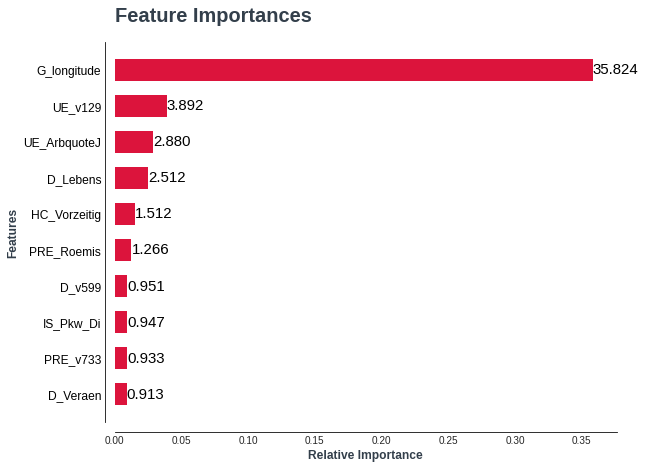

In [9]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-10:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=15 , color='black')




In [12]:
explainer = shap.KernelExplainer(rf.predict,X)

Using 401 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

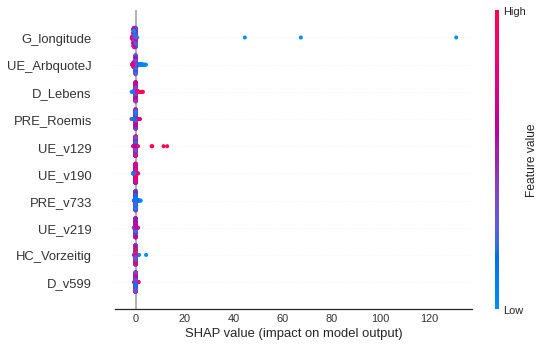

In [14]:
shap.summary_plot(shap_values, X,max_display=10)

# **West Germany**

In [15]:
df = pd.read_stata('/content/std_inz0_75.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [16]:
df = df[df['eastwest'] == 1.0]
Y = df['std_inz_0to75']
X = df.loc[:, ~df.columns.isin(['std_inz_0to75', 'eastwest'])]

In [17]:
rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

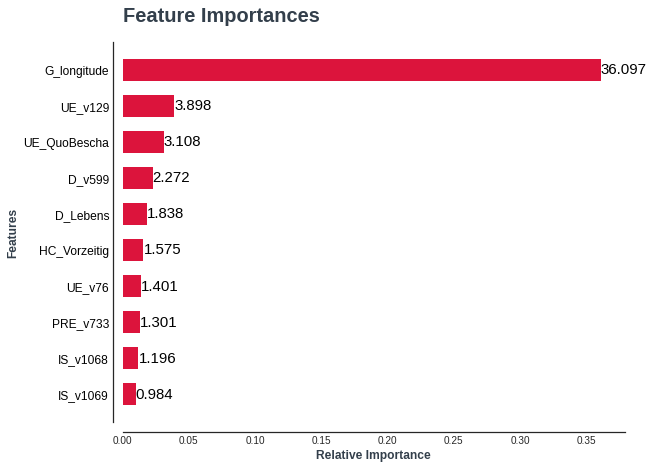

In [18]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-10:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=15 , color='black')




In [19]:
explainer = shap.KernelExplainer(rf.predict,X)

Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

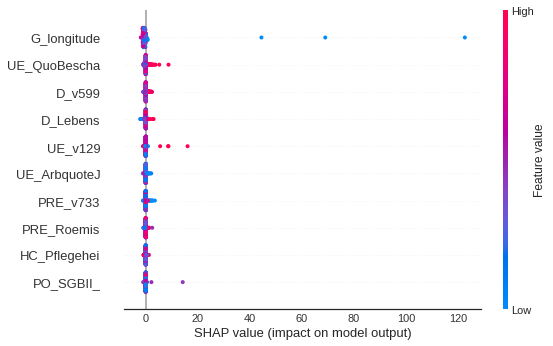

In [21]:
shap.summary_plot(shap_values, X,max_display=10)

# **East Germany**

In [3]:
df = pd.read_stata('/content/std_inz0_75.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df = df[df['eastwest'] == 0.0]
Y = df['std_inz_0to75']
X = df.loc[:, ~df.columns.isin(['std_inz_0to75', 'eastwest'])]

In [5]:
rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

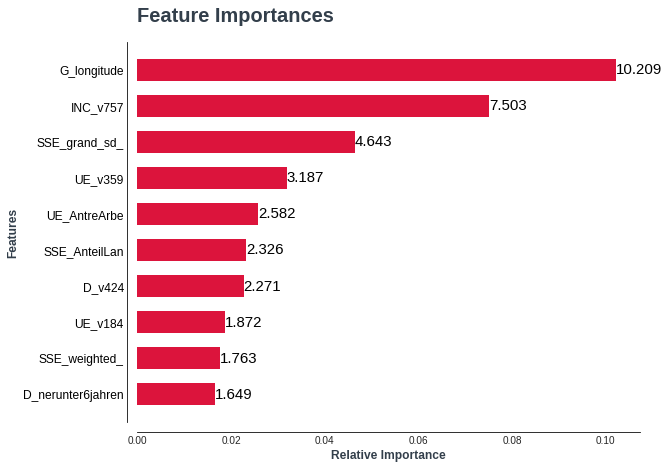

In [6]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-10:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=15 , color='black')




In [ ]:
explainer = shap.KernelExplainer(rf.predict,X)
shap_values = explainer.shap_values(X, nsamples=100)

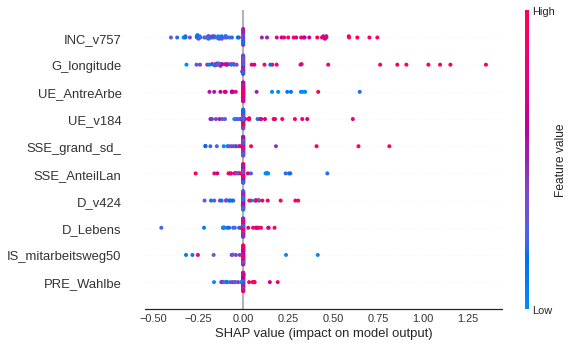

In [8]:
shap.summary_plot(shap_values, X,max_display=10)